# ITS307 Data Analytics : Spring Semester 2022
# Assignment 4

# Unsupervised Learning: Clustering

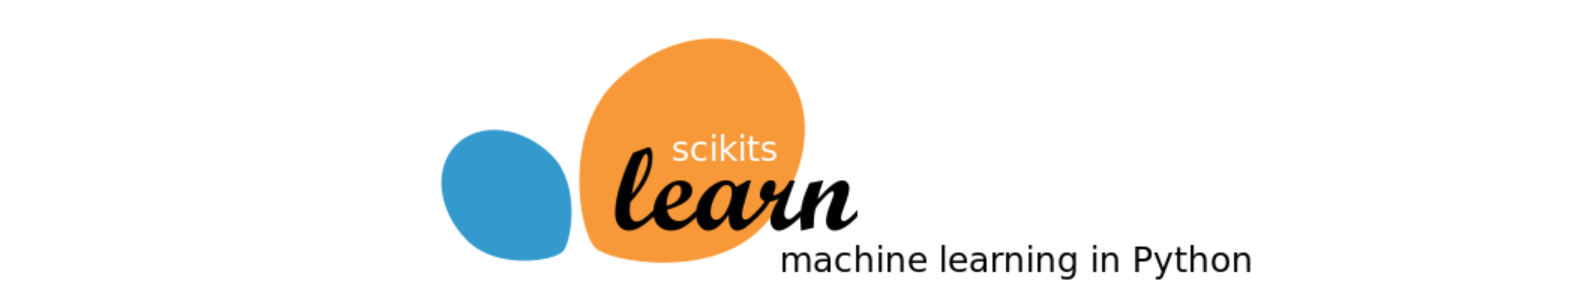

# Table of Contents 
<ol start="0">
<li> Part A </li>
<li> Part B </li>
<li> Part C</li>
</ol>

## Note: Handle null values and special characters if any.

# Part A

Instructions:
1. Read data from data1.csv file and give random column names such as A, B, C and so on.


2. Use both Elbow method and silhouette_score to find best value of K for KMean clustering. Justify your answer.


3. Create Kmean model with value of K chosen from second step. Evaluate your model and justify the goodness of your model.


In [367]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [368]:
columns =['A','B','C','D','E','F','G','H','I','J','K','L','M']

In [369]:
df = pd.read_csv('data1.csv',names = columns,na_values = '?')
df.head()

A     B     C     D    E     F     G     H     I     J     K     L  \
0  14.23  1.71  2.43  15.6  127  2.80  3.06  0.28  2.29  5.64  1.04  3.92   
1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28  4.38  1.05  3.40   
2  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81  5.68  1.03  3.17   
3  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18  7.80  0.86  3.45   
4  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82  4.32  1.04  2.93   

      M  
0  1065  
1  1050  
2  1185  
3  1480  
4   735

In [370]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       178 non-null    float64
 1   B       178 non-null    float64
 2   C       178 non-null    float64
 3   D       178 non-null    float64
 4   E       178 non-null    int64  
 5   F       178 non-null    float64
 6   G       178 non-null    float64
 7   H       178 non-null    float64
 8   I       178 non-null    float64
 9   J       178 non-null    float64
 10  K       178 non-null    float64
 11  L       178 non-null    float64
 12  M       178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [371]:
df.isnull().sum()

A    0
B    0
C    0
D    0
E    0
F    0
G    0
H    0
I    0
J    0
K    0
L    0
M    0
dtype: int64

In [372]:
df.drop(['B','C','D','E','F','G','H','I','J','K','L'],axis =1,inplace = True)
df

A     M
0    14.23  1065
1    13.20  1050
2    13.16  1185
3    14.37  1480
4    13.24   735
..     ...   ...
173  13.71   740
174  13.40   750
175  13.27   835
176  13.17   840
177  14.13   560

[178 rows x 2 columns]

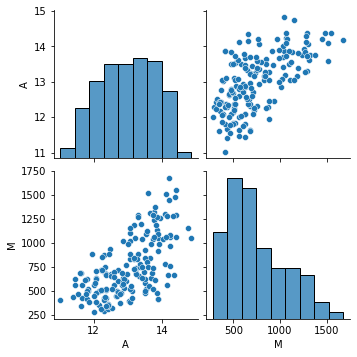

In [373]:

sns.pairplot(df)

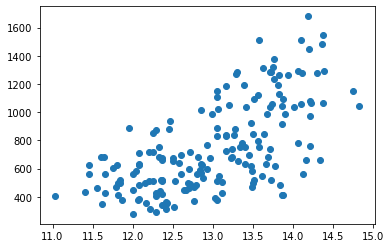

In [374]:
plt.scatter(df['A'],df['M'])

# Traing model for kmean

In [375]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=2) 

In [376]:
kmean.fit(df)

C:\Users\dawat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2)

In [377]:
kmean.labels_

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [378]:
df['cluster']= kmean.labels_
df.head()

A     M  cluster
0  14.23  1065        0
1  13.20  1050        0
2  13.16  1185        0
3  14.37  1480        0
4  13.24   735        1

In [379]:
data = [[14.23,1065]]
kmean.predict(data)

C:\Users\dawat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0])

In [380]:
cluster0 = df[df.cluster == 0] 

In [381]:
cluster1 = df[df.cluster == 1] 

In [382]:
centroid0 = kmean.cluster_centers_
centroid0

array([[  13.66654545, 1151.72727273],
       [  12.70284553,  565.8699187 ]])

In [383]:
centroiddf = pd.DataFrame(data=kmean.cluster_centers_,columns=['x','y']) 
centroiddf

x            y
0  13.666545  1151.727273
1  12.702846   565.869919

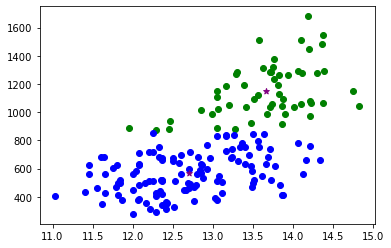

In [384]:
plt.scatter(cluster0['A'],cluster0['M'],color='green')
plt.scatter(cluster1['A'],cluster1['M'],color='blue')
plt.scatter(centroiddf.x,centroiddf.y,color='purple',marker='*',label='centroid')

Justification

# ELBOW METHOD

In [385]:
K = np.arange(1,10)
sse = []
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(df.drop('cluster',axis=1))
    sse.append(km.inertia_)

C:\Users\dawat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dawat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dawat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dawat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Window

In [386]:
sse

[17552625.625942133,
 4507966.185337798,
 2337923.9471920785,
 1298952.7127767836,
 886734.5981977141,
 617685.2945177194,
 381436.5002096008,
 292704.75140531646,
 241473.55299536887]

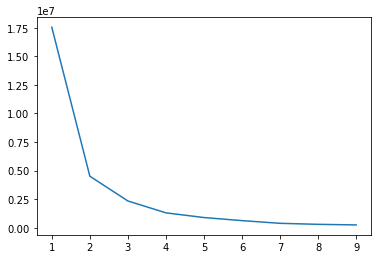

In [387]:
plt.plot(K,sse)

According to elbow method we take the value of K as when the graphs forms elbow like structure. So from the above graph,
we know the the best value of K is 2 since it bends at 2

# Shilouette_score

In [388]:
from sklearn.metrics import silhouette_score
sil_scores = []
K = np.arange(2,11)
for k in K:
    km = KMeans(n_clusters = k)
    km.fit(df.drop('cluster',axis=1))
    sil_scores.append(silhouette_score(df.drop('cluster',axis=1),km.labels_,metric='euclidean'))

C:\Users\dawat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dawat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dawat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dawat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Window

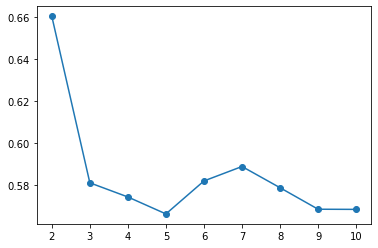

In [389]:
plt.plot(K,sil_scores,'-o') 

In [390]:
sil_scores

[0.6605508700594223,
 0.5809325234492815,
 0.5741650840029081,
 0.5660679805900279,
 0.581830175068107,
 0.5887291236031773,
 0.578580562735905,
 0.5683083151308088,
 0.5682388625223584]

The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters.
since our values lies between 0 and 1 it indicates that the value of k is good

# Part B

### INSTRUCTIONS
1. Read data from data2.csv and give any random column names such as x,y.


2. Use appropriate techniques to find best choices of algorithm to apply to given dataset. Justify your choice.


3. Create clustering model from your choices of algorithm in step 2. Tune required hyperparameters to get expected clusters.


4. Use seaborn to plot your clusters using different markers and colors for each clusters formed.


5. Evaluate your model and justify the goodness of the cluster formed.

In [392]:
column = ('x','y')

In [473]:
df = pd.read_csv('data2.csv',names = column)
df.head()

x         y
0  1.481265 -1.058590
1  0.360573 -1.157805
2 -1.684897 -1.133287
3  1.946917 -1.187486
4  0.220311  0.844432

In [474]:
df.isnull().sum()

x    0
y    0
dtype: int64

In [475]:
# import seaborn as sns
# sns.pairplot(df)
# plt.show()

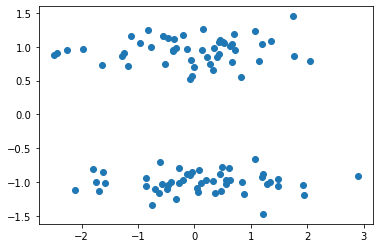

In [476]:
plt.scatter(df['x'],df['y'])

In [477]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.6,min_samples=10)
dbscan.fit(df)

DBSCAN(eps=0.6, min_samples=10)

In [478]:
dbscan.labels_

array([ 0,  0, -1,  0,  1,  0,  1,  1, -1,  0,  1,  1,  0,  1,  1,  1,  1,
        1,  0,  1, -1,  0,  1,  1,  0, -1,  0,  0,  1,  0,  0,  1,  1,  0,
        0,  1,  0,  1,  0,  0,  0,  0,  1, -1,  1,  0,  1,  1,  1,  0,  1,
        1, -1,  0,  1,  1, -1,  1,  0,  0, -1,  1,  1, -1,  0,  1, -1,  1,
        0,  1,  0,  0,  0,  0,  1,  0,  0,  1, -1,  1,  0,  0,  0, -1,  1,
        0,  1,  0,  0, -1,  1,  1,  0, -1,  1,  0,  0,  1,  0,  1],
      dtype=int64)

In [479]:
# df['DBSCAN_opt_labels']=dbscan.labels_
# df['DBSCAN_opt_labels'].value_counts()

In [480]:
# cluster1.head()

x         y  DBSCAN_opt_labels
4   0.220311  0.844432                  1
6  -1.125771  1.161369                  1
7  -0.524397  0.744974                  1
10  0.498376  1.075230                  1
11  0.445149  1.103469                  1

In [488]:
cluster0 = df[df['DBSCAN_opt_labels']==0]
cluster1 = df[df['DBSCAN_opt_labels'] == 1]
cluster = df[df['DBSCAN_opt_labels']== -1]


KeyError: 'DBSCAN_opt_labels'

C:\Users\dawat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dawat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dawat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

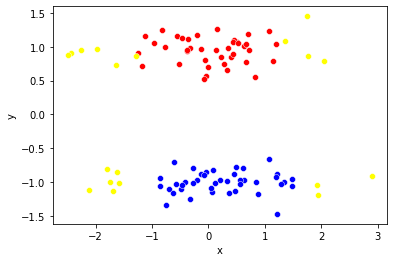

In [489]:

sns.scatterplot(cluster0['x'], cluster0['y'], color='blue')
sns.scatterplot(cluster1['x'], cluster1['y'], color='red')
sns.scatterplot(cluster['x'], cluster['y'], color='yellow')


In [483]:
from sklearn.metrics import silhouette_score 

In [484]:
sil_coeff = silhouette_score(df, dbscan.labels_, metric='euclidean')
sil_coeff

0.48637707038082917

According to elbow method we take the value of K as when the graphs forms elbow like structure. So from the above graph,
we know the the best value of K is 2 since it bends at 2

# Part C

### INSTRUCTIONS:

1. Read data from data3.csv and name columns as x and y.


2. Assuming 4 clusters in the given datasets, compare both clustering algorithm and mention which algorithm is more suitable.


3. Use seaborn to plot your clusters for both the algorithms.

In [485]:
c = ('x','y')

In [486]:
df = pd.read_csv('data3.csv',names = c)
df

x          y
0  -4.394278   9.986850
1  -3.446856  -0.340388
2  -2.924456  -0.115665
3  -4.533322   2.782269
4  -4.257819   8.498752
..       ...        ...
95 -6.005893   0.197806
96  0.180038   6.898378
97 -5.744999  12.434546
98 -3.816837  -2.081060
99 -1.436312   9.332665

[100 rows x 2 columns]

C:\Users\dawat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

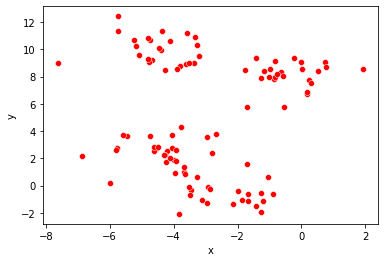

In [487]:
sns.scatterplot(df['x'],df['y'],color = 'red')

In [530]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=1,min_samples=6)
db.fit(df)

DBSCAN(eps=1, min_samples=6)

In [531]:
db.labels_

array([ 0,  1,  1,  1,  0,  1,  0,  2,  1,  2,  2,  0,  0,  2,  2,  1,  1,
        0,  1,  1,  1,  0,  1,  2,  0,  2,  0,  2,  2,  1,  0,  1,  1,  1,
        2, -1,  2,  2,  1, -1,  0,  0,  2,  0,  1,  1,  0,  2,  1,  0,  2,
        1,  0,  1, -1,  2,  1,  1,  2,  2,  1,  1, -1,  0, -1,  1, -1,  1,
        0, -1,  1,  1,  0,  0,  1,  0,  1,  1, -1,  1,  1,  1,  1,  0, -1,
        2, -1, -1,  1,  0,  1,  1, -1, -1,  2, -1,  2, -1, -1,  2],
      dtype=int64)

In [532]:
cluster_0 = df[df['DBSCAN_opt_label']==0]
cluster_1 = df[df['DBSCAN_opt_label'] == 1]
cluster = df[df['DBSCAN_opt_label']== -1]
cluster_2 = df[df['DBSCAN_opt_label']== 2]

KeyError: 'DBSCAN_opt_label'

In [533]:
sns.scatterplot(cluster_0['x'], cluster_0['y'], color='blue')
sns.scatterplot(cluster_1['x'], cluster_1['y'], color='red')
sns.scatterplot(cluster['x'], cluster['y'], color='yellow')
sns.scatterplot(cluster_2['x'], cluster_2['y'], color='black')


NameError: name 'cluster_0' is not defined

In [535]:
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=3)
kmean.fit(df)
KMeans(n_clusters=4) 
kmean.labels_

C:\Users\dawat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 1, 1, 1, 2, 1, 2, 0, 1, 0, 0, 2, 2, 0, 0, 1, 1, 2, 1, 1, 1, 2,
       1, 0, 2, 0, 2, 0, 0, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 2,
       1, 1, 2, 0, 1, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 0, 1, 1, 2, 2, 1, 1,
       0, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1,
       1, 2, 1, 1, 1, 0, 0, 1, 0, 2, 1, 0])

In [536]:
df['cluster'] = kmean.labels_
df.head()

x         y  cluster
0 -4.394278  9.986850        2
1 -3.446856 -0.340388        1
2 -2.924456 -0.115665        1
3 -4.533322  2.782269        1
4 -4.257819  8.498752        2

In [537]:
cluster0 = df[df.cluster == 0]  
cluster1= df[df.cluster == 1]  
cluster2 = df[df.cluster == 2] 
cluster3 = df[df.cluster == 3] 
cluster4 = df[df.cluster == 2] 


centroid0 = kmean.cluster_centers_
centroid0

array([[-0.39233905,  8.09893604],
       [-3.48225061,  1.15792497],
       [-4.46343585,  9.96867608]])

KeyError: 'y)'

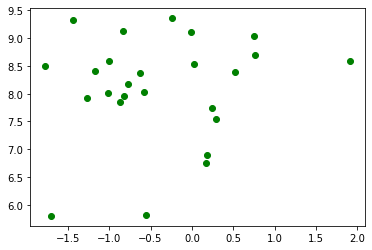

In [539]:
# centroiddf = pd.DataFrame(data=kmean.cluster_centers_,columns=['x','y'])  
# plt.scatter(cluster0['x'],cluster0['y'],color='green')
# plt.scatter(cluster1['x'],cluster1['y)'],color='blue')
# plt.scatter(cluster2['x'],cluster2['y'],color='red')
# plt.scatter(centroiddf.x,centroiddf.y,color='purple',marker='*',label='centroid')